# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# **Import The Dataset**

In [2]:
data = pd.read_csv('HousingData.csv')


# **Visualize the dataset**

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:

import altair as alt

chart = alt.Chart(data).mark_point().encode(
    x='CRIM',
    y='MEDV',
    tooltip=['CRIM', 'MEDV']
).properties(
    title='Scatter plot of CRIM vs MEDV'
).interactive()

chart

alt.Chart(...)

# **Handle Missing Values**

In [5]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [6]:
data = data.fillna(data.mean(numeric_only=True))


# **Plot Histogram**

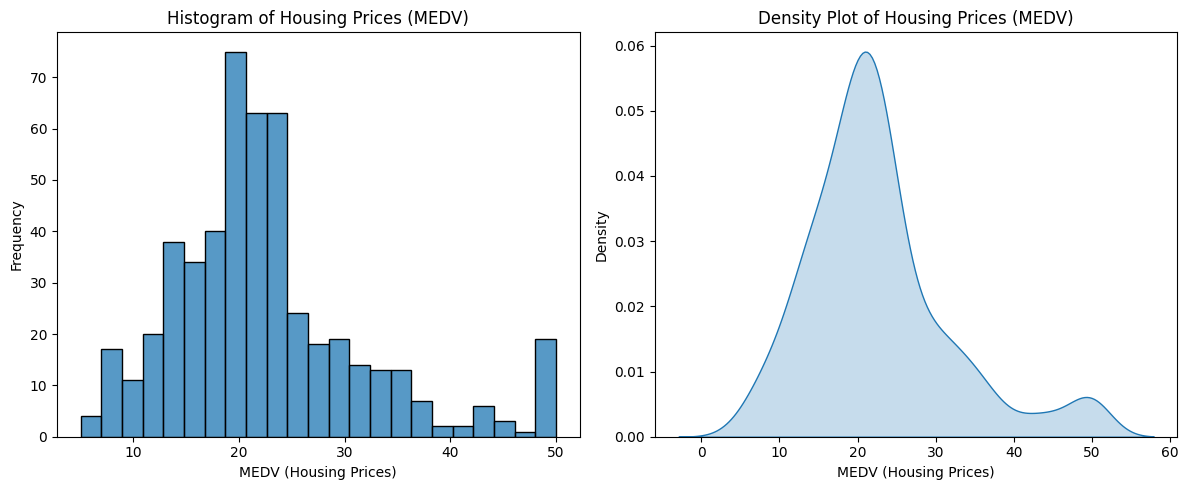

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(data['MEDV'], kde=False, ax=axes[0])
axes[0].set_title('Histogram of Housing Prices (MEDV)')
axes[0].set_xlabel('MEDV (Housing Prices)')
axes[0].set_ylabel('Frequency')

# Density Plot
sns.kdeplot(data['MEDV'], fill=True, ax=axes[1])
axes[1].set_title('Density Plot of Housing Prices (MEDV)')
axes[1].set_xlabel('MEDV (Housing Prices)')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# **Correlation Matrix**

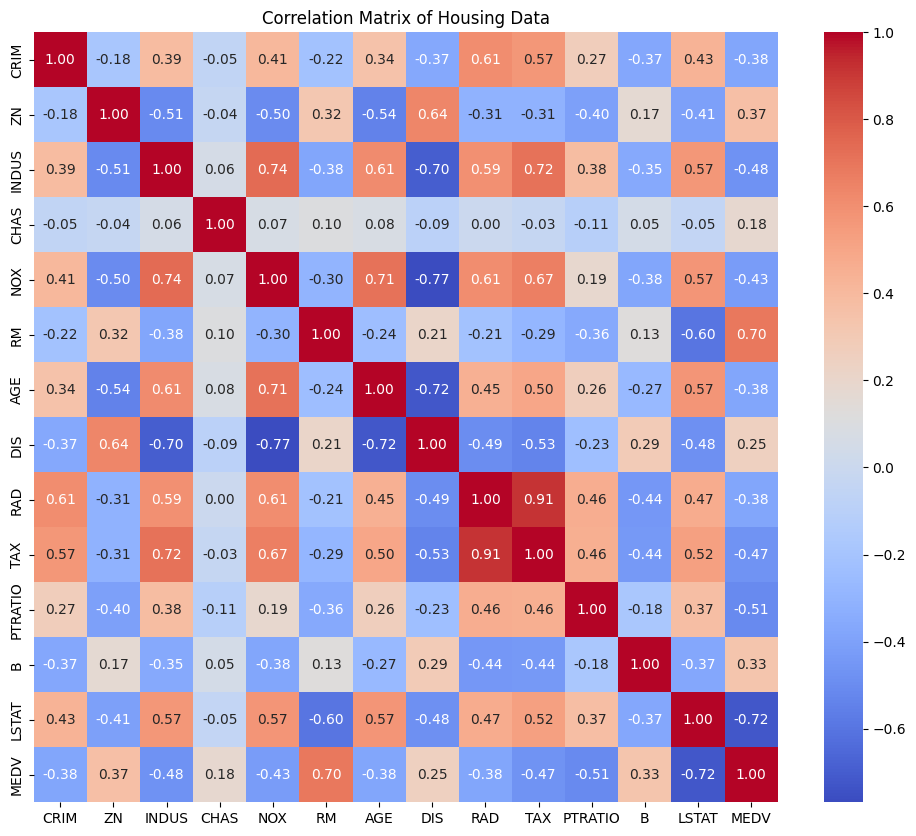

In [8]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Data')
plt.show()

# **Split Into Training and Testing set**

In [9]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [10]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Bundle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Build Regression Models**

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

## Linear Regression

In [12]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preprocess and train
lr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
lr_pipe.fit(X_train, y_train)

# Evaluate
y_pred = lr_pipe.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"RMSE: {lr_rmse:.4f}")
print(f"R2 Score: {lr_r2:.4f}")

Linear Regression:
RMSE: 5.0018
R2 Score: 0.6589


## Ridge Regression

In [13]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])
ridge_pipe.fit(X_train, y_train)

y_pred = ridge_pipe.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_r2 = r2_score(y_test, y_pred)

print("\nRidge Regression:")
print(f"RMSE: {ridge_rmse:.4f}")
print(f"R2 Score: {ridge_r2:.4f}")


Ridge Regression:
RMSE: 5.0021
R2 Score: 0.6588


## KNN Regression

In [14]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor

knn_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor(n_neighbors=5))
])
knn_pipe.fit(X_train, y_train)

y_pred = knn_pipe.predict(X_test)
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
knn_r2 = r2_score(y_test, y_pred)

print("\nKNN Regression:")
print(f"RMSE: {knn_rmse:.4f}")
print(f"R2 Score: {knn_r2:.4f}")


KNN Regression:
RMSE: 4.7302
R2 Score: 0.6949


## Decision Tree Regression

In [15]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])
dt_pipe.fit(X_train, y_train)

y_pred = dt_pipe.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
dt_r2 = r2_score(y_test, y_pred)

print("\nDecision Tree Regression:")
print(f"RMSE: {dt_rmse:.4f}")
print(f"R2 Score: {dt_r2:.4f}")


Decision Tree Regression:
RMSE: 3.4157
R2 Score: 0.8409


## Gradient Boosting Regression

In [16]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

gb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])
gb_pipe.fit(X_train, y_train)

y_pred = gb_pipe.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
gb_r2 = r2_score(y_test, y_pred)

print("\nGradient Boosting Regression:")
print(f"RMSE: {gb_rmse:.4f}")
print(f"R2 Score: {gb_r2:.4f}")


Gradient Boosting Regression:
RMSE: 2.7137
R2 Score: 0.8996


## XGBoost Regression

In [17]:
# XGBoost Regression
from xgboost import XGBRegressor

xgb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])
xgb_pipe.fit(X_train, y_train)

y_pred = xgb_pipe.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_r2 = r2_score(y_test, y_pred)

print("\nXGBoost Regression:")
print(f"RMSE: {xgb_rmse:.4f}")
print(f"R2 Score: {xgb_r2:.4f}")


XGBoost Regression:
RMSE: 2.4975
R2 Score: 0.9149


# **Choose The Best Model**

In [21]:
print("Model Performance Summary:")
print(f"Linear Regression - RMSE: {lr_rmse:.4f}, R2 Score: {lr_r2:.4f}")
print(f"Ridge Regression - RMSE: {ridge_rmse:.4f}, R2 Score: {ridge_r2:.4f}")
print(f"KNN Regression - RMSE: {knn_rmse:.4f}, R2 Score: {knn_r2:.4f}")
print(f"Decision Tree Regression - RMSE: {dt_rmse:.4f}, R2 Score: {dt_r2:.4f}")
print(f"Gradient Boosting Regression - RMSE: {gb_rmse:.4f}, R2 Score: {gb_r2:.4f}")
print(f"XGBoost Regression - RMSE: {xgb_rmse:.4f}, R2 Score: {xgb_r2:.4f}")

best_model = max([(lr_r2, 'Linear Regression'), (ridge_r2, 'Ridge Regression'), (knn_r2, 'KNN Regression'),
                  (dt_r2, 'Decision Tree Regression'), (gb_r2, 'Gradient Boosting Regression'),
                  (xgb_r2, 'XGBoost Regression')])

print(f"\nBased on R2 score, the best performing model is: {best_model[1]} with R2 score of {best_model[0]:.4f}")

lowest_rmse_model = min([(lr_rmse, 'Linear Regression'), (ridge_rmse, 'Ridge Regression'), (knn_rmse, 'KNN Regression'),
                         (dt_rmse, 'Decision Tree Regression'), (gb_rmse, 'Gradient Boosting Regression'),
                         (xgb_rmse, 'XGBoost Regression')])

print(f"Based on RMSE, the best performing model is: {lowest_rmse_model[1]} with RMSE of {lowest_rmse_model[0]:.4f}")

Model Performance Summary:
Linear Regression - RMSE: 5.0018, R2 Score: 0.6589
Ridge Regression - RMSE: 5.0021, R2 Score: 0.6588
KNN Regression - RMSE: 4.7302, R2 Score: 0.6949
Decision Tree Regression - RMSE: 3.4157, R2 Score: 0.8409
Gradient Boosting Regression - RMSE: 2.7137, R2 Score: 0.8996
XGBoost Regression - RMSE: 2.4975, R2 Score: 0.9149

Based on R2 score, the best performing model is: XGBoost Regression with R2 score of 0.9149
Based on RMSE, the best performing model is: XGBoost Regression with RMSE of 2.4975


**Based on the R2 scores and RMSE values, XGBoost Regression performed the best among all the models. Its R2 score is the highest (0.9149), and its RMSE is the lowest (2.4975), indicating a good fit and prediction accuracy.**

In [22]:
print("Model Performance Summary:")
print(f"Linear Regression - RMSE: {lr_rmse:.4f}, R2 Score: {lr_r2:.4f}")
print(f"Ridge Regression - RMSE: {ridge_rmse:.4f}, R2 Score: {ridge_r2:.4f}")
print(f"KNN Regression - RMSE: {knn_rmse:.4f}, R2 Score: {knn_r2:.4f}")
print(f"Decision Tree Regression - RMSE: {dt_rmse:.4f}, R2 Score: {dt_r2:.4f}")
print(f"Gradient Boosting Regression - RMSE: {gb_rmse:.4f}, R2 Score: {gb_r2:.4f}")
print(f"XGBoost Regression - RMSE: {xgb_rmse:.4f}, R2 Score: {xgb_r2:.4f}")

best_model = max([(lr_r2, 'Linear Regression'), (ridge_r2, 'Ridge Regression'), (knn_r2, 'KNN Regression'),
                  (dt_r2, 'Decision Tree Regression'), (gb_r2, 'Gradient Boosting Regression'),
                  (xgb_r2, 'XGBoost Regression')])

print(f"\nBased on R2 score, the best performing model is: {best_model[1]} with R2 score of {best_model[0]:.4f}")

lowest_rmse_model = min([(lr_rmse, 'Linear Regression'), (ridge_rmse, 'Ridge Regression'), (knn_rmse, 'KNN Regression'),
                         (dt_rmse, 'Decision Tree Regression'), (gb_rmse, 'Gradient Boosting Regression'),
                         (xgb_rmse, 'XGBoost Regression')])

print(f"Based on RMSE, the best performing model is: {lowest_rmse_model[1]} with RMSE of {lowest_rmse_model[0]:.4f}")

Model Performance Summary:
Linear Regression - RMSE: 5.0018, R2 Score: 0.6589
Ridge Regression - RMSE: 5.0021, R2 Score: 0.6588
KNN Regression - RMSE: 4.7302, R2 Score: 0.6949
Decision Tree Regression - RMSE: 3.4157, R2 Score: 0.8409
Gradient Boosting Regression - RMSE: 2.7137, R2 Score: 0.8996
XGBoost Regression - RMSE: 2.4975, R2 Score: 0.9149

Based on R2 score, the best performing model is: XGBoost Regression with R2 score of 0.9149
Based on RMSE, the best performing model is: XGBoost Regression with RMSE of 2.4975


# **Plot the results for XGBoost Regression**

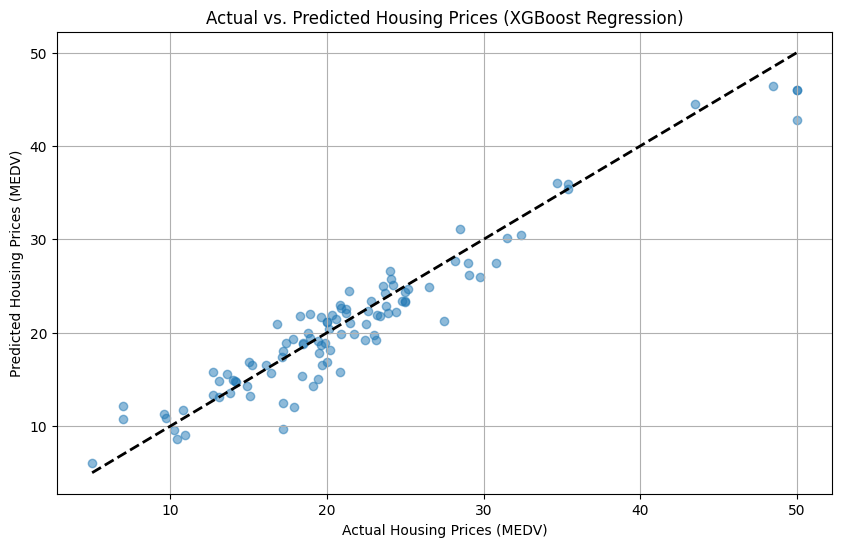

In [18]:
# Plotting the results for XGBoost Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Housing Prices (MEDV)')
plt.ylabel('Predicted Housing Prices (MEDV)')
plt.title('Actual vs. Predicted Housing Prices (XGBoost Regression)')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The XGBoost Regression model achieved the best performance among the evaluated models, with the lowest RMSE (2.4975) and the highest R2 score (0.9149).
*   Tree-based models (Decision Tree, Gradient Boosting, and XGBoost) generally outperformed the linear models (Linear Regression and Ridge Regression).

### Insights or Next Steps

*   Focus further model improvement efforts on the XGBoost model through hyperparameter tuning using techniques like Grid Search or Random Search.
*   Explore feature engineering to potentially create new, more informative features that could further enhance model performance.
